In [3]:
from sympy import *
from random import gauss
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [8]:
xinput = np.zeros(shape=(300,1))
xinput = np.array(np.random.uniform(0, 1, (300, 1)))

In [132]:
vnoise = np.zeros(shape=(300,1))
vnoise = np.array(np.random.uniform(-1/10, 1/10, (300, 1)))


In [133]:
xi = Symbol('xi')
vi = Symbol('vi')

In [134]:
di1 = sin(20*xi) + 3*xi + vi

In [135]:
print(di)

vi + 3*xi + sin(20*xi)


In [17]:
d = np.zeros(shape=(300,1))
for i in range(300):
    d[i] = di.evalf(subs={xi : float(xinput[i]), vi : float(vnoise[i])})

In [19]:
d = np.column_stack((xinput,d))
xpoints = []
ypoints = []
for i in range(300): 
    xpoints = xpoints + [d[i][0]]
for i in range(300): 
    ypoints = ypoints + [d[i][1]]


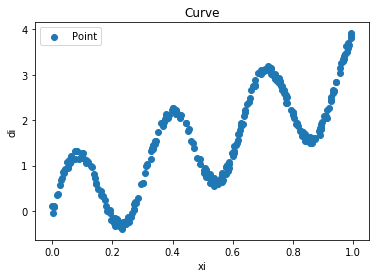

In [20]:
plt.scatter(xpoints, ypoints, marker="o", label="Point")
# plt.plot(xpoints, ypoints)
plt.xlabel('xi')
plt.ylabel('di')
plt.legend()
plt.title('Curve')
plt.show()

In [153]:
xmean = np.mean(xinput)
xsd = np.std(xinput)
xnorm = np.zeros(shape=(300,1))
for i in range(300):
    xnorm[i] = (xinput[i] - xmean)/xsd

In [154]:
w1 = np.zeros(shape=(24,2))
w2 = np.zeros(shape=(1,25))

In [155]:
# w1 = np.array(0.01*np.random.randn(-1, 1, (24,2)))
# w2 = np.array(0.01*np.random.randn(-2, 2, (1,25)))
for i in range(2):
    for j in range(24):
        w1[j][i] = np.random.normal(0,1)

for i in range(25):
        w2[0][i] = np.random.normal(0,(1/24)**1/2)        

In [156]:
vi = Symbol('vi')
phi1 = tanh(vi)
phi1diff = phi1.diff(vi)
print(phi1diff)

1 - tanh(vi)**2


In [157]:
# Initial y value
y = np.zeros(shape=(300,1))
errorValue = 0
errorValueList = []

for i in range(300):
    v1 = w1.dot([1, xnorm[i]])
    ytemp = []
    for j in range(24):
        ytemp = ytemp + [np.tanh(v1[j])]    
    v2 = w2.dot(np.concatenate(([1], ytemp)))
    y[i] = v2

In [46]:
epoch = 0
eta1 = 0.001
eta2 = 0.001
errorValue = 0
errorValueList = []
while true:    
    for i in range(300):
        errorValue = errorValue + ((d[i][1] - y[i])**2)
    errorValueList = errorValueList + [errorValue/300]
    print(errorValue)
    
    if (len(errorValueList) == 1 and errorValueList[0] > 0.005) or (len(errorValueList) >1 and abs(errorValueList[epoch] - errorValueList[epoch-1]) > 0.005):
        print('Error Value List len '+str(len(errorValueList)))
        epoch = epoch + 1;        
        for i in range(300):
#           Forward pass
            v1 = w1.dot([1, xnorm[i]])
            y1 = []
            for j in range(24):
                y1 = y1 + [np.tanh(v1[j])]
            v2 = w2.dot(np.concatenate(([1], y1)))
            y[i] = v2
            
#           Backward Pass
            if d[i][1] != y[i]:                
                delta2 = d[i][1] - y[i]
                w2_ext = np.delete(w2, (0), axis=1)
                temp = np.zeros(shape=(1,24))
                for j in range(24):
                    temp[0][j] = 1-(np.tanh(float(v1[j]))**2)
                
                delta1 = []
                delta1 = -1*delta2*np.multiply(np.transpose(w2_ext),np.transpose(temp))
                
                xTemp = np.reshape(np.concatenate(([1], xnorm[i])),(1,2))
                pDW1 = -1*delta1.dot(xTemp)
                pDW2 = -1*delta2*np.concatenate(([1], y1))
                w1 = w1 + eta1 * pDW1 
                w2 = w2 + eta2 * pDW2 
#     else:
            print('Threshold reached')
            break;

Threshold reached


In [45]:
# Calculating the final y value
for i in range(300):
    v1 = w1.dot([1, xnorm[i]])
    ytemp = []
    for j in range(24):
        ytemp = ytemp + [np.tanh(v1[j])]    
    v2 = w2.dot(np.concatenate(([1], ytemp)))
    y[i] = v2

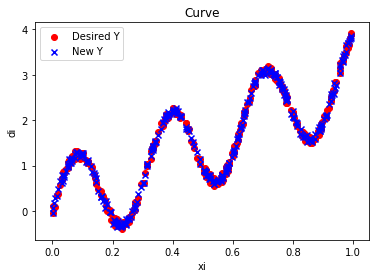

In [29]:
plt.scatter(xpoints, ypoints, marker="o",color="Red", label="Desired Y")
# plt.plot(xpoints, ypoints)
plt.xlabel('xi')
plt.ylabel('di')
plt.legend()
plt.title('Curve')
plt.scatter(xpoints, y, marker="x",color="Blue", label="New Y")
# plt.plot(xpoints, ypoints)
plt.xlabel('xi')
plt.ylabel('di')
plt.legend()
plt.title('Curve')
plt.show()

In [37]:
epochList = []
for i  in range(1, epoch+1):
    epochList = epochList + [i]

In [38]:
len(epochList)

858

In [41]:
len(errorList)

858

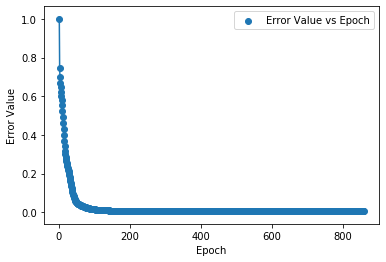

In [42]:
plt.scatter(epochList, errorList, marker="o", label="Error Value vs Epoch")
plt.plot(epochList, errorList)
plt.xlabel('Epoch')
plt.ylabel('Error Value')
plt.legend()
plt.title('')
plt.show()